# MNIST project

## Data exploration

In [1]:
from keras.datasets import mnist

In [2]:
#loading the dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
#Let's see the shape of the datas
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


We confirm that the dataset is splitted in 4.

X_train contains 60000 images to train the model, in dimension 28x28 as they are in gray scale

Y_train contains the label of the 60000 images in the X_train set as digit labels

X_test contains 10000 images in the same dimension as X_train, to test the model

Y_train contains the labels of the 10000 images of the training set

We will normalize the values of the X_train and X_test :

In [9]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

We can plot our datas to see what kind of data we are dealing with. As they are not just datas but image, we will be using imshow to plot some of them

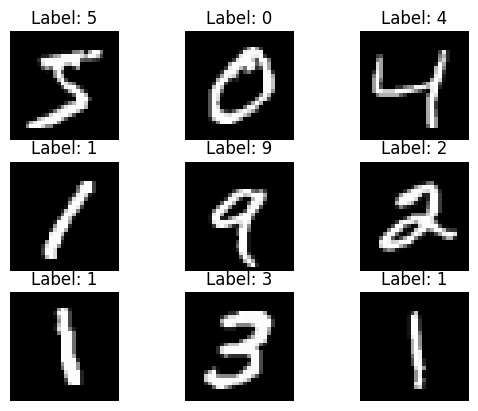

In [10]:
from matplotlib import pyplot
for i in range(9):
  pyplot.subplot(3, 3, 1 + i)
  pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
  pyplot.title(f"Label: {Y_train[i]}")
  pyplot.axis('off')
pyplot.show()

The labels are digit labels, we need to transform them as vectors. The images are already in the right shape : 28x28 so we don't need to modify them.

In [11]:
from keras.utils import to_categorical
#one-hot encode target column
y_train = to_categorical(Y_train)
y_test = to_categorical(Y_test)

Let's check if the one-hot encoder worked. The first image was a 5, so we need to have a vector that reflect this 5 :

In [12]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Model creation

Let's start with a sequential model to begin with

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

# Create a Sequential model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    # First convolution layer : number of filter : 32, kernel : 3x3, activation fonction relu to supress any noise that can be present
    MaxPooling2D((2, 2)),
    # Maxpooling to increase the contrast
    Conv2D(64, (3, 3), activation='relu'),
    # Second convolution layer : number of filter 64 to look for more feature, kernel and activation function: still 3x3 and Relu
    MaxPooling2D((2, 2)),
    Flatten(),
    # We convert the 2D matrix to a 1D vector
    Dense(64, activation='relu'),
    # First fully connected layer with a high number of neurons
    Dense(10, activation='softmax')
    # Second fully connected layer with the number of neurons equivalent to the number of classes : 0 to 9 : 10 and a Softmax used for classification
])

# Compile the model
model.compile(optimizer='adam',
              # Best optimizer right now is adam
              loss='sparse_categorical_crossentropy',
              # We are in a multi class classification problem, so loss used is cross entropy
              metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 64)               

Let's now define the epochs and batch size of the dataset. We'll start with some standards values first :

In [8]:
epochs = 20
batch_size = 32

In [16]:
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, Y_test))

Epoch 1/20
1875/1875 [==============================] - 60s 31ms/step - loss: 0.1480 - accuracy: 0.9545 - val_loss: 0.0537 - val_accuracy: 0.9825
Epoch 2/20
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0482 - accuracy: 0.9851 - val_loss: 0.0417 - val_accuracy: 0.9859
Epoch 3/20
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0324 - accuracy: 0.9898 - val_loss: 0.0387 - val_accuracy: 0.9876
Epoch 4/20
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0255 - accuracy: 0.9918 - val_loss: 0.0351 - val_accuracy: 0.9880
Epoch 5/20
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0194 - accuracy: 0.9939 - val_loss: 0.0300 - val_accuracy: 0.9903
Epoch 6/20
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0147 - accuracy: 0.9949 - val_loss: 0.0384 - val_accuracy: 0.9891
Epoch 7/20
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0116 - accuracy: 0.9962 - val_loss: 0.0398 -

## Model validation

To see the result of the training and compare it to the validation set, let's plot the loss vs epochs :

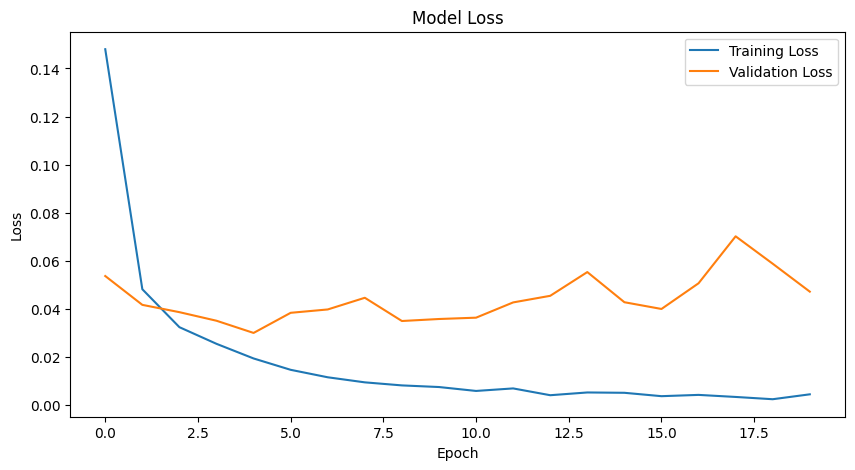

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

## Model modification

The loss validation curve isn't satisfying, it ends almost at the same value that it started from, and doesn't improve at all. Seeing the value of the training loss so low, we can think of an overfitting problem. The model might be too complex and learn the training data too well, and have some issue with data that it hasn't seen.



Let's take this opportunity to create a function for our model, utilizing it will be easier. Let's modify a bit the model and add 2 dropout layers.

In [35]:
# First we start by clearing the previous model and state
tf.keras.backend.clear_session()
# We also import the adam optimizer to be able to fix the learning rate
from tensorflow.keras.optimizers import Adam

# Function to build the model
def build_model():
  model = Sequential([
    # First convolution layer : number of filter : 32, kernel : 3x3, activation fonction relu to supress any noise that can be present
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    # Maxpooling to increase the contrast
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    # Second convolution layer : number of filter 64 to look for more feature, kernel and activation function: still 3x3 and Relu
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    # We convert the 2D matrix to a 1D vector
    Flatten(),
    # First fully connected layer with a high number of neurons
    Dense(64, activation='relu'),
    Dropout(0.25),
    # Second fully connected layer with the number of neurons equivalent to the number of classes : 0 to 9 : 10 and a Softmax used for classification
    Dense(10, activation='softmax')
  ])
  # Selection of the optimizer
  optimizer = Adam(learning_rate=0.001)
  # Compile the model
  model.compile(optimizer=optimizer,
              # We are in a multi class classification problem, so loss used is cross entropy
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  return model

We also see that 20 epochs is too much, and that could also be an answer to our overfitting problem. We will add an early stopping to try and prevent this phenomenon.





In [36]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

Then we create and train the new model :

In [37]:
model = build_model()
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, Y_test), callbacks =[early_stopping])

Epoch 1/20
1875/1875 [==============================] - 68s 36ms/step - loss: 0.2210 - accuracy: 0.9326 - val_loss: 0.0563 - val_accuracy: 0.9821
Epoch 2/20
1875/1875 [==============================] - 63s 34ms/step - loss: 0.0832 - accuracy: 0.9751 - val_loss: 0.0369 - val_accuracy: 0.9883
Epoch 3/20
1875/1875 [==============================] - 63s 33ms/step - loss: 0.0592 - accuracy: 0.9820 - val_loss: 0.0352 - val_accuracy: 0.9888
Epoch 4/20
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0518 - accuracy: 0.9843 - val_loss: 0.0325 - val_accuracy: 0.9885
Epoch 5/20
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0422 - accuracy: 0.9876 - val_loss: 0.0279 - val_accuracy: 0.9911
Epoch 6/20
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0360 - accuracy: 0.9887 - val_loss: 0.0301 - val_accuracy: 0.9903
Epoch 7/20
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0342 - accuracy: 0.9896 - val_loss: 0.0271 -

We seems to have a better validation curve, let's plot it :

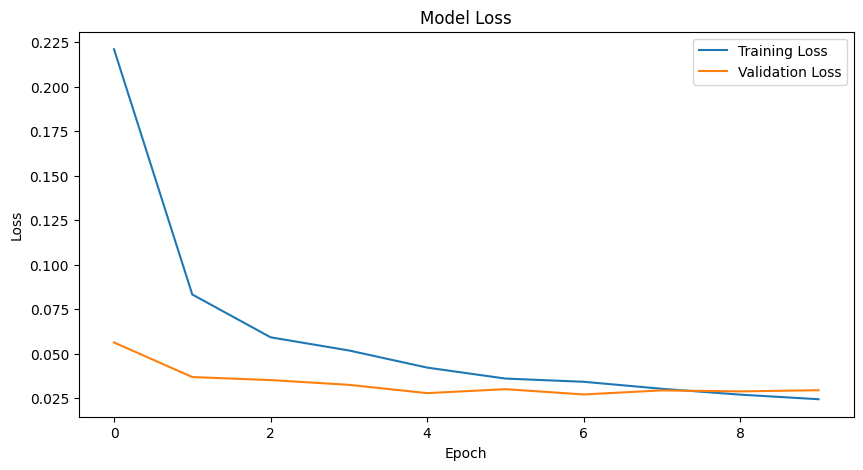

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

## Testing the model

Let's test the model over a few images to see by ourself if he can predict correctly the right labels :

In [42]:
# Select a number of images and their labels
num_images = 10
test_images = X_test[:num_images]
test_labels = Y_test[:num_images]

In [43]:
predictions = model.predict(test_images)

1/1 [==============================] - 0s 25ms/step


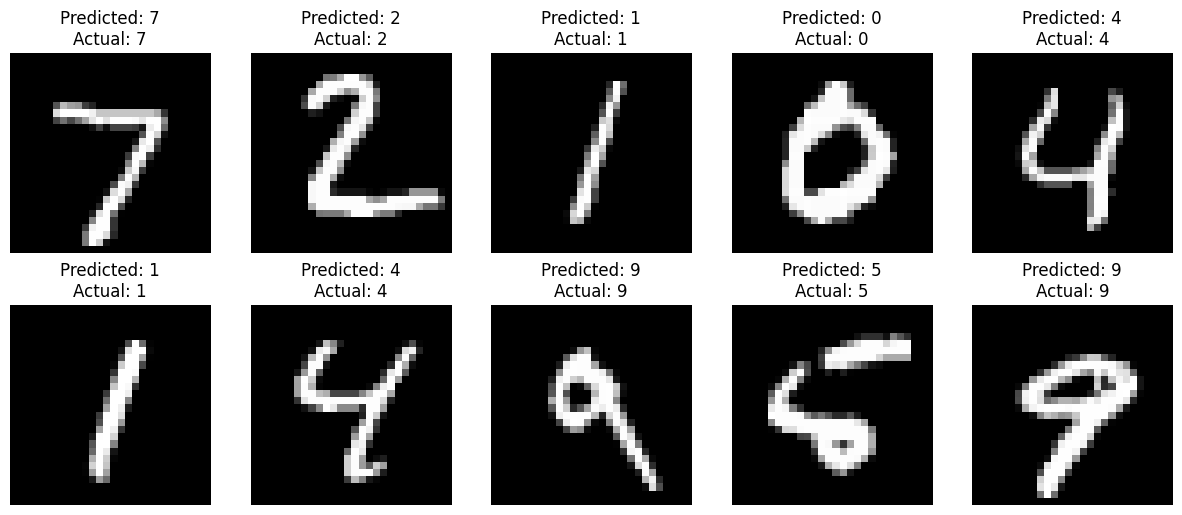

In [46]:
import numpy as np

plt.figure(figsize=(15, 6))
for i in range(num_images):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}\nActual: {test_labels[i]}")
    plt.axis('off')
plt.show()

The model managed to predict all 10 images, great!

## Conclusion

I have practiced how to create a convolutional neural network with this project using Tensorflow and Keras, while gaining some experience in the Computer Vision domain.

I created a CNN first with standard values and layers and when confronted with an overfitting problem, learned to manipulate some of the many variable to get past this issue.

I have now a model that works remarquably well with an accuracy of more than 99% that I am proud of.